<h1>Import all necessary Libraries</h1>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print("✓ Plotting style configured")

✓ All libraries imported successfully!
✓ Plotting style configured


# Step 1: Data Loading and Arrangement

In [42]:
# Load the Excel file
file_path = 'PCA_DataSheet.xlsx'

# Check available sheets
excel_file = pd.ExcelFile(file_path)
print("Available sheets:", excel_file.sheet_names)


Available sheets: ['Fuchka', 'Tamarind']


In [43]:
# Load both datasets
df_fuchka = pd.read_excel(file_path, sheet_name='Fuchka')
df_tamarind = pd.read_excel(file_path, sheet_name='Tamarind')

print(f"\nFuchka dataset shape: {df_fuchka.shape}")
print(f"Tamarind dataset shape: {df_tamarind.shape}")



Fuchka dataset shape: (42, 12)
Tamarind dataset shape: (42, 14)


<h3>Examine the datasets</h3>

In [44]:
print("=== FUCHKA DATASET ===")
print("Columns:", list(df_fuchka.columns))
print("\nFirst 5 rows:")
print(df_fuchka.head())

=== FUCHKA DATASET ===
Columns: ['Sample ID', 'Pb', 'Cd', 'Cr', 'Hg', 'Co', 'Ni', 'Al', 'Fe', 'Cu', 'Zn', 'Mn']

First 5 rows:
   Sample ID       Pb     Cd      Cr     Hg     Co      Ni        Al  \
0          1  1790.62  48.04  141.16  0.550  53.86  462.26  21126.69   
1          2    86.32   1.00   10.00  4.710  10.00   10.00   4269.81   
2          3  1190.14  29.58  101.52  4.344  47.18  317.98   8444.97   
3          4    10.00   1.00  142.34  0.550  60.34  233.06   6107.98   
4          5    10.00   1.00  116.78  0.550  57.06  261.96   3461.49   

         Fe       Cu       Zn       Mn  
0  18971.68  1400.48  4391.82  6275.88  
1  17148.46  1266.94  5395.86  6087.30  
2  63266.96  1386.72  5232.78  5352.08  
3  11899.68  1354.14  6348.70  7407.26  
4   9796.88  1222.76  4742.80  5631.78  


In [45]:
print("\n=== TAMARIND DATASET ===")
print("Columns:", list(df_tamarind.columns))
print("\nFirst 5 rows:")
print(df_tamarind.head())


=== TAMARIND DATASET ===
Columns: ['Sample ID', 'Pb', 'Cd', 'Cr', 'Hg', 'Co', 'Ni', 'Al', 'Fe', 'Cu', 'Zn', 'Mn', 'Sb', 'As']

First 5 rows:
   Sample ID         Pb       Cd        Cr       Hg      Co       Ni  \
0          1     1.2500   2.0475  18.86625  0.37500  4.1675  21.9550   
1          2     1.2500  13.3380  37.70625  0.37500  1.2500   1.2500   
2          3     1.2500   1.8720  68.57625  0.37500  5.5950  20.0025   
3          4     1.2500   6.4350  14.78875  0.37500  1.2500   5.6875   
4          5  2689.8975   7.8000  24.04875  1.01275  3.0250  52.7925   

           Al          Fe        Cu        Zn         Mn     Sb       As  
0  2849.26625   9219.2975  342.6425  408.7250  2189.7475   0.00  17.6150  
1  2244.35750   8062.3800  339.0900  250.0525  1097.1975   0.00   1.2500  
2  5647.76750  11449.1825  466.3300  558.1450  1569.5975  60.11  91.1475  
3  4057.42875  11744.1975  222.1325  446.5475  1237.5225   0.00   1.2500  
4  2235.84000   2770.1975  150.3725  883.5125   40

<h3>Select Dataset</h3>

In [46]:
DATASET = 'Tamarind'  # Change to 'Fuchka' for Fuchka dataset

In [47]:
if DATASET == 'Fuchka':
    df_original = df_fuchka.copy()
else:
    df_original = df_tamarind.copy()

print(f"Selected dataset: {DATASET}")
print(f"Original shape: {df_original.shape}")

Selected dataset: Tamarind
Original shape: (42, 14)


<h3>Drop columns that are not important for analysis</h3

In [48]:
df_pca = df_original.drop('Sample ID', axis=1)

print(f"Shape after removing Sample ID: {df_pca.shape}")
print(f"Variables for PCA: {list(df_pca.columns)}")

Shape after removing Sample ID: (42, 13)
Variables for PCA: ['Pb', 'Cd', 'Cr', 'Hg', 'Co', 'Ni', 'Al', 'Fe', 'Cu', 'Zn', 'Mn', 'Sb', 'As']


<h3>Check for missing values</h3>

In [49]:
missing_values = df_pca.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\n⚠️ Missing values found!")
else:
    print("\n✓ No missing values found.")

Missing values per column:
Pb    0
Cd    0
Cr    0
Hg    0
Co    0
Ni    0
Al    0
Fe    0
Cu    0
Zn    0
Mn    0
Sb    0
As    0
dtype: int64

✓ No missing values found.


In [50]:
print(f"\nBasic Statistics for {DATASET} Dataset:")
print(df_pca.describe())


Basic Statistics for Tamarind Dataset:
                Pb         Cd           Cr          Hg         Co          Ni  \
count    42.000000  42.000000    42.000000   42.000000  42.000000   42.000000   
mean    188.536488   6.727310   140.278304    4.986042   4.461488   39.043690   
std     741.797819   6.137890   574.140163   27.001564   6.829519   75.340613   
min       1.250000   0.500000     1.250000    0.375000   1.250000    1.250000   
25%       1.250000   2.120625    22.554375    0.375000   1.250000    6.453750   
50%       1.250000   5.683000    37.512500    0.375000   1.250000   18.192500   
75%       9.082500   8.443500    68.782500    0.986187   5.278750   43.549375   
max    3952.610000  33.696000  3762.973750  175.729250  42.595000  436.045000   

                 Al            Fe          Cu           Zn           Mn  \
count     42.000000     42.000000   42.000000    42.000000    42.000000   
mean    4581.521905   7829.322917  335.374583   698.381131  1218.394881   
std  

# Step 2: Data Standardization


In [51]:
print("=== BEFORE STANDARDIZATION ===")
print("Means:")
print(df_pca.mean().round(2))
print("\nStandard Deviations:")
print(df_pca.std().round(2))

=== BEFORE STANDARDIZATION ===
Means:
Pb     188.54
Cd       6.73
Cr     140.28
Hg       4.99
Co       4.46
Ni      39.04
Al    4581.52
Fe    7829.32
Cu     335.37
Zn     698.38
Mn    1218.39
Sb      48.03
As      35.00
dtype: float64

Standard Deviations:
Pb     741.80
Cd       6.14
Cr     574.14
Hg      27.00
Co       6.83
Ni      75.34
Al    4039.47
Fe    7010.49
Cu     233.24
Zn     528.25
Mn    1106.71
Sb     136.82
As      68.71
dtype: float64


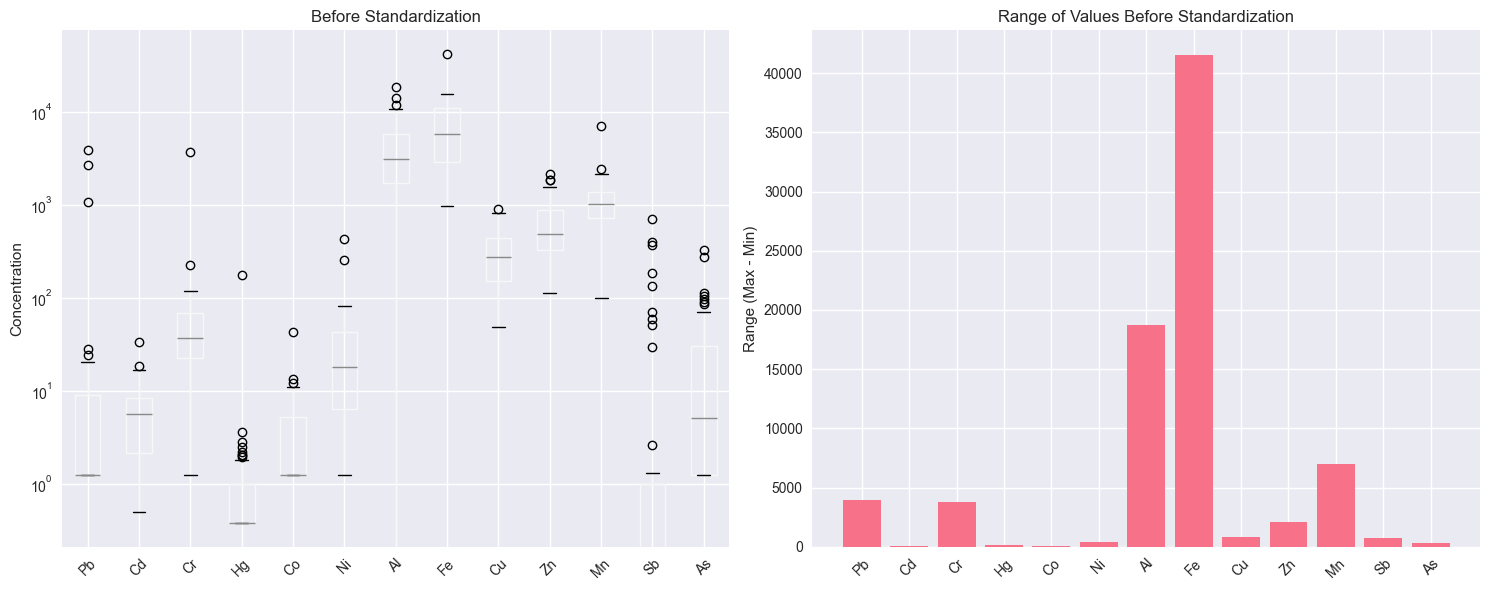

In [52]:
# Visualize the scale differences
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
df_pca.boxplot(ax=plt.gca(), rot=45)
plt.title('Before Standardization')
plt.ylabel('Concentration')
plt.yscale('log')  # Log scale to better see the differences

plt.subplot(1, 2, 2)
# Show the range of values
ranges = df_pca.max() - df_pca.min()
plt.bar(range(len(ranges)), ranges.values)
plt.xticks(range(len(ranges)), ranges.index, rotation=45)
plt.title('Range of Values Before Standardization')
plt.ylabel('Range (Max - Min)')

plt.tight_layout()
plt.show()

In [53]:
# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
df_standardized = pd.DataFrame(
    scaler.fit_transform(df_pca),
    columns=df_pca.columns,
    index=df_pca.index
)

print("✓ Standardization applied!")

✓ Standardization applied!


In [54]:
print("=== AFTER STANDARDIZATION ===")
print("Means (should be ~0):")
print(df_standardized.mean().round(10))
print("\nStandard Deviations (should be ~1):")
print(df_standardized.std().round(10))

# Check if standardization worked properly
mean_check = np.allclose(df_standardized.mean(), 0, atol=1e-10)
std_check = np.allclose(df_standardized.std(), 1, atol=1e-10)

print(f"\nStandardization Verification:")
print(f"✓ All means ≈ 0: {mean_check}")
print(f"✓ All std dev ≈ 1: {std_check}")

=== AFTER STANDARDIZATION ===
Means (should be ~0):
Pb    0.0
Cd   -0.0
Cr    0.0
Hg    0.0
Co    0.0
Ni   -0.0
Al   -0.0
Fe    0.0
Cu   -0.0
Zn   -0.0
Mn   -0.0
Sb   -0.0
As   -0.0
dtype: float64

Standard Deviations (should be ~1):
Pb    1.012122
Cd    1.012122
Cr    1.012122
Hg    1.012122
Co    1.012122
Ni    1.012122
Al    1.012122
Fe    1.012122
Cu    1.012122
Zn    1.012122
Mn    1.012122
Sb    1.012122
As    1.012122
dtype: float64

Standardization Verification:
✓ All means ≈ 0: True
✓ All std dev ≈ 1: False


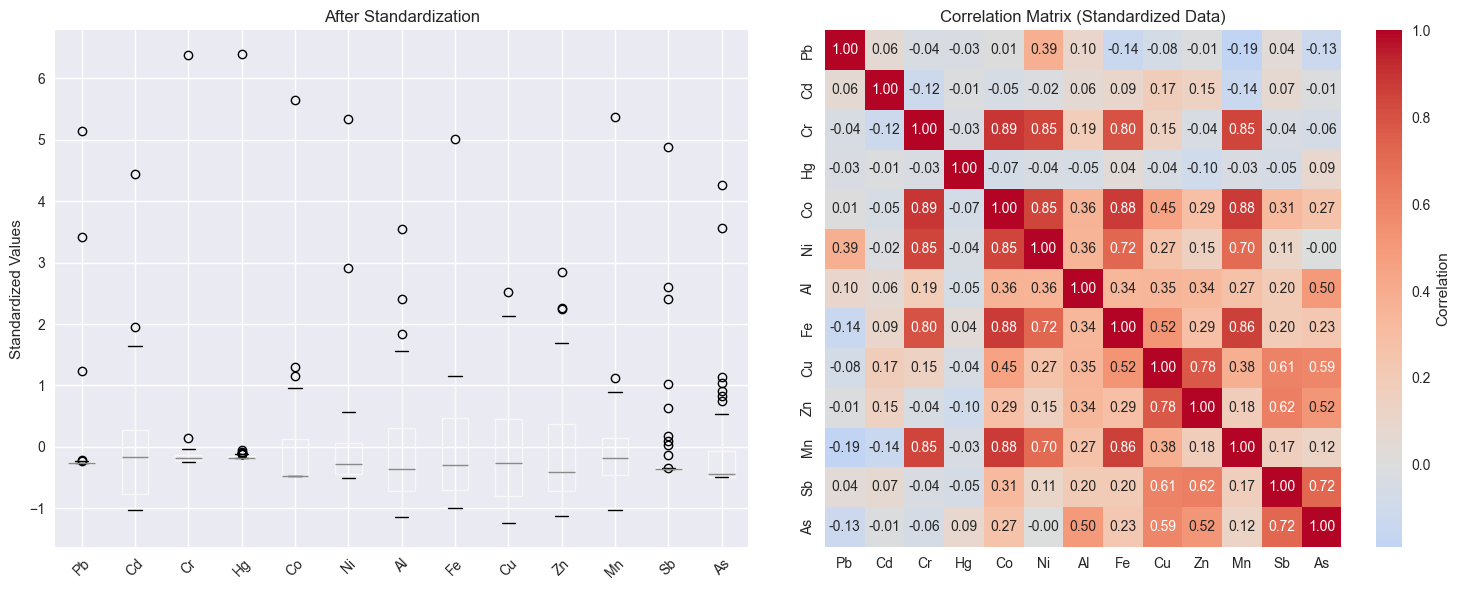

📊 Now all variables are on the same scale and ready for PCA!


In [55]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
df_standardized.boxplot(ax=plt.gca(), rot=45)
plt.title('After Standardization')
plt.ylabel('Standardized Values')

plt.subplot(1, 2, 2)
# Correlation heatmap
correlation_matrix = df_standardized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix (Standardized Data)')

plt.tight_layout()
plt.show()

print("📊 Now all variables are on the same scale and ready for PCA!")


# Step 3: PCA Analysis and Eigenvalues

### 3.1 Perform initial PCA with all components


In [56]:
pca_full = PCA()
pca_full.fit(df_standardized)

# Get eigenvalues and eigenvectors
eigenvalues = pca_full.explained_variance_
eigenvectors = pca_full.components_
explained_variance_ratio = pca_full.explained_variance_ratio_

print("=== EIGENVALUES ANALYSIS ===")
print("Eigenvalues for each component:")
for i, eigenval in enumerate(eigenvalues, 1):
    print(f"PC{i}: {eigenval:.4f}")

=== EIGENVALUES ANALYSIS ===
Eigenvalues for each component:
PC1: 5.1297
PC2: 2.7481
PC3: 1.3427
PC4: 1.0576
PC5: 1.0413
PC6: 0.8212
PC7: 0.5259
PC8: 0.2359
PC9: 0.1642
PC10: 0.1143
PC11: 0.0809
PC12: 0.0329
PC13: 0.0225


### 3.2 Apply Kaiser Rule

In [57]:
# Kaiser Rule: Keep components with eigenvalue > 1
kaiser_components = np.sum(eigenvalues > 1)

print(f"\n=== KAISER RULE (Eigenvalue > 1) ===")
print(f"Number of components to retain: {kaiser_components}")
print(f"Components to keep: PC1 to PC{kaiser_components}")

# Show which components meet Kaiser criterion
print("\nComponents meeting Kaiser criterion:")
for i, eigenval in enumerate(eigenvalues, 1):
    status = "✓ Keep" if eigenval > 1 else "✗ Discard"
    print(f"PC{i}: {eigenval:.4f} ({status})")



=== KAISER RULE (Eigenvalue > 1) ===
Number of components to retain: 5
Components to keep: PC1 to PC5

Components meeting Kaiser criterion:
PC1: 5.1297 (✓ Keep)
PC2: 2.7481 (✓ Keep)
PC3: 1.3427 (✓ Keep)
PC4: 1.0576 (✓ Keep)
PC5: 1.0413 (✓ Keep)
PC6: 0.8212 (✗ Discard)
PC7: 0.5259 (✗ Discard)
PC8: 0.2359 (✗ Discard)
PC9: 0.1642 (✗ Discard)
PC10: 0.1143 (✗ Discard)
PC11: 0.0809 (✗ Discard)
PC12: 0.0329 (✗ Discard)
PC13: 0.0225 (✗ Discard)


#  Step 4: Scree Plot (Elbow Curve) Analysis


### 4.1 Create and analyze scree plot

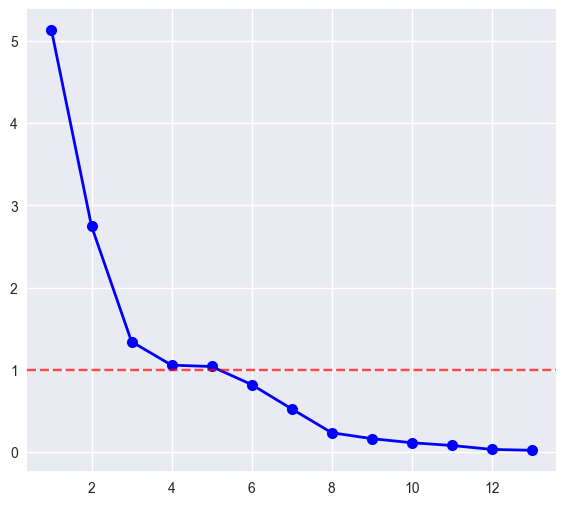

In [58]:

plt.figure(figsize=(15, 6))

# Scree plot
plt.subplot(1, 2, 1)
pc_numbers = range(1, len(eigenvalues) + 1)
plt.plot(pc_numbers, eigenvalues, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Kaiser Criterion (λ=1)')


([<matplotlib.axis.XTick at 0x1ecaa491000>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

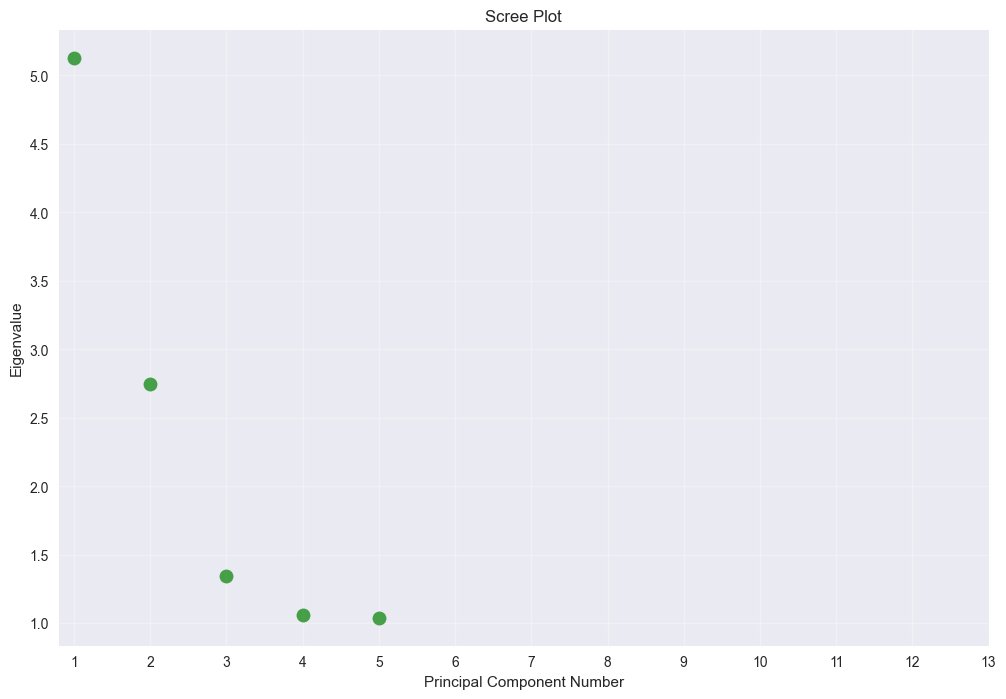

In [59]:
# Highlight components that meet Kaiser rule
for i in range(kaiser_components):
    plt.plot(i+1, eigenvalues[i], 'go', markersize=10, alpha=0.7)

plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(pc_numbers)

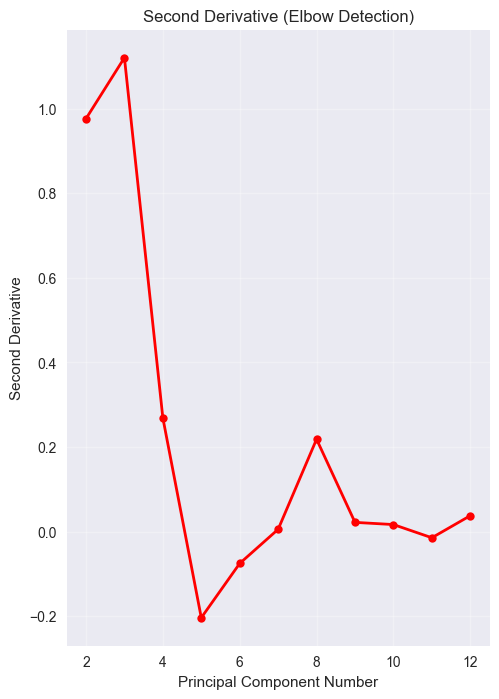

In [60]:
# Second derivative method to find elbow
plt.subplot(1, 2, 2)
first_diff = np.diff(eigenvalues)
second_diff = np.diff(first_diff)

plt.plot(range(2, len(eigenvalues)), second_diff, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Principal Component Number')
plt.ylabel('Second Derivative')
plt.title('Second Derivative (Elbow Detection)')
plt.grid(True, alpha=0.3)

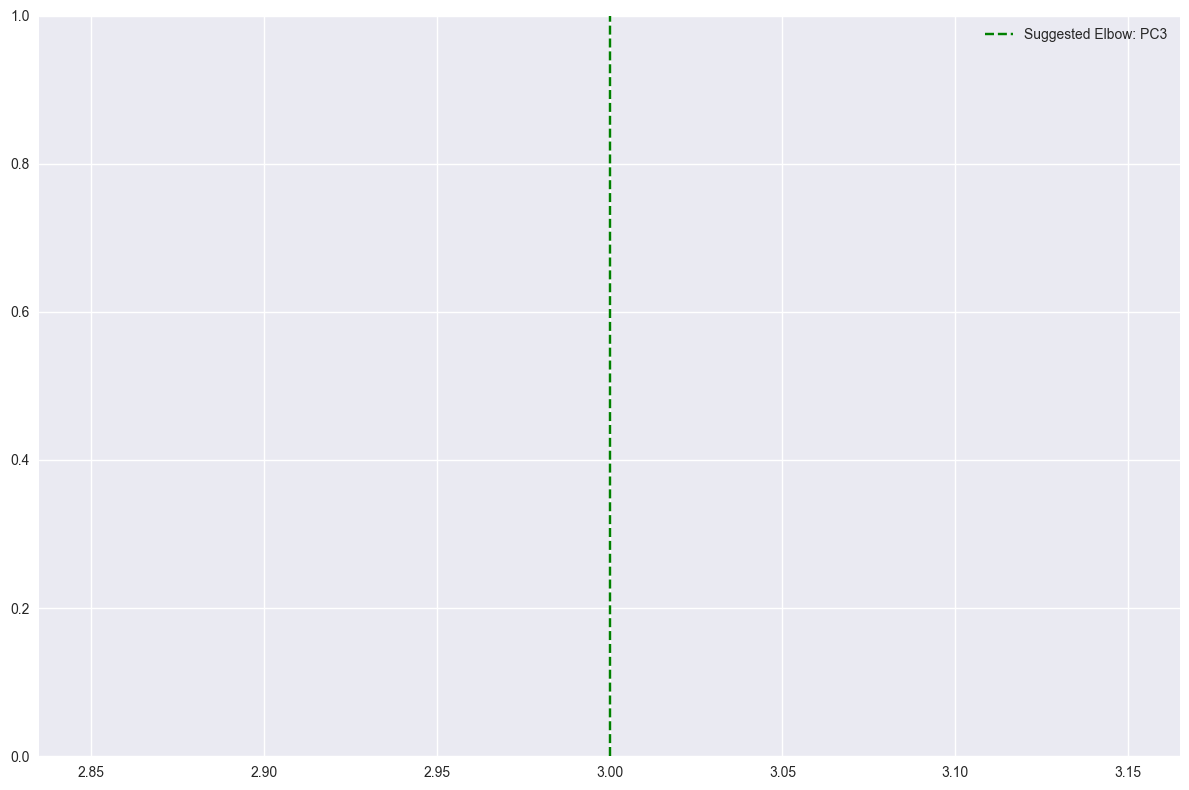

📈 Scree plot suggests elbow at: PC3


In [61]:
# Find elbow point
elbow_point = np.argmax(second_diff) + 2  # +2 because of double differencing
plt.axvline(x=elbow_point, color='green', linestyle='--', 
           label=f'Suggested Elbow: PC{elbow_point}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"📈 Scree plot suggests elbow at: PC{elbow_point}")


# Step 5: Cumulative Variance Analysis

### 5.1 Calculate cumulative variance

In [62]:

cumulative_variance = np.cumsum(explained_variance_ratio)

print("=== CUMULATIVE VARIANCE ANALYSIS ===")
print("Individual and Cumulative Variance Explained:")
for i, (individual, cumulative) in enumerate(zip(explained_variance_ratio, cumulative_variance), 1):
    print(f"PC{i}: {individual:.3f} ({individual*100:.1f}%) | Cumulative: {cumulative:.3f} ({cumulative*100:.1f}%)")


=== CUMULATIVE VARIANCE ANALYSIS ===
Individual and Cumulative Variance Explained:
PC1: 0.385 (38.5%) | Cumulative: 0.385 (38.5%)
PC2: 0.206 (20.6%) | Cumulative: 0.592 (59.2%)
PC3: 0.101 (10.1%) | Cumulative: 0.692 (69.2%)
PC4: 0.079 (7.9%) | Cumulative: 0.772 (77.2%)
PC5: 0.078 (7.8%) | Cumulative: 0.850 (85.0%)
PC6: 0.062 (6.2%) | Cumulative: 0.912 (91.2%)
PC7: 0.039 (3.9%) | Cumulative: 0.951 (95.1%)
PC8: 0.018 (1.8%) | Cumulative: 0.969 (96.9%)
PC9: 0.012 (1.2%) | Cumulative: 0.981 (98.1%)
PC10: 0.009 (0.9%) | Cumulative: 0.990 (99.0%)
PC11: 0.006 (0.6%) | Cumulative: 0.996 (99.6%)
PC12: 0.002 (0.2%) | Cumulative: 0.998 (99.8%)
PC13: 0.002 (0.2%) | Cumulative: 1.000 (100.0%)


### 5.2 Find components needed for variance thresholds


In [63]:
# Common thresholds
thresholds = [0.70, 0.80, 0.90, 0.95]
components_needed = {}

for threshold in thresholds:
    components = np.argmax(cumulative_variance >= threshold) + 1
    components_needed[f"{threshold*100:.0f}%"] = components

print(f"\n=== COMPONENTS NEEDED FOR VARIANCE THRESHOLDS ===")
for threshold, components in components_needed.items():
    print(f"{threshold} variance: {components} components")



=== COMPONENTS NEEDED FOR VARIANCE THRESHOLDS ===
70% variance: 4 components
80% variance: 5 components
90% variance: 6 components
95% variance: 7 components


### 5.3 Visualize cumulative variance

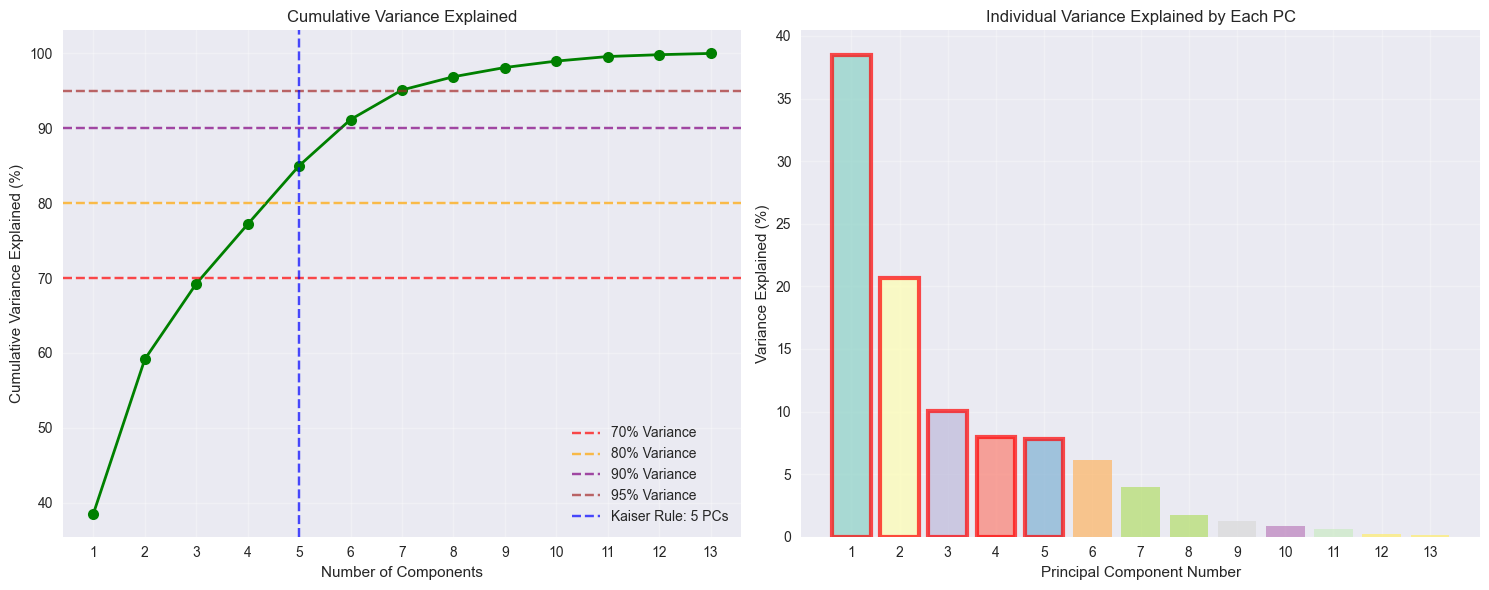

In [64]:
plt.figure(figsize=(15, 6))

# Cumulative variance plot
plt.subplot(1, 2, 1)
plt.plot(pc_numbers, cumulative_variance * 100, 'go-', linewidth=2, markersize=8)

# Add threshold lines
colors = ['red', 'orange', 'purple', 'brown']
for i, (threshold, color) in enumerate(zip(thresholds, colors)):
    plt.axhline(y=threshold*100, color=color, linestyle='--', alpha=0.7, 
               label=f'{threshold*100:.0f}% Variance')
    
# Highlight Kaiser components
plt.axvline(x=kaiser_components, color='blue', linestyle='--', alpha=0.7,
           label=f'Kaiser Rule: {kaiser_components} PCs')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(pc_numbers)

# Individual variance contribution
plt.subplot(1, 2, 2)
colors_pc = plt.cm.Set3(np.linspace(0, 1, len(explained_variance_ratio)))
bars = plt.bar(pc_numbers, explained_variance_ratio * 100, color=colors_pc, alpha=0.7)

# Highlight Kaiser components
for i in range(kaiser_components):
    bars[i].set_edgecolor('red')
    bars[i].set_linewidth(3)

plt.xlabel('Principal Component Number')
plt.ylabel('Variance Explained (%)')
plt.title('Individual Variance Explained by Each PC')
plt.grid(True, alpha=0.3)
plt.xticks(pc_numbers)

plt.tight_layout()
plt.show()


### 5.4 Decision on number of components

In [65]:
print("=== COMPONENT SELECTION SUMMARY ===")
print(f"Kaiser Rule (λ > 1): {kaiser_components} components")
print(f"Scree Plot Elbow: {elbow_point} components")
for threshold, components in components_needed.items():
    print(f"{threshold} Variance: {components} components")

# Use Kaiser rule as primary decision
n_components = kaiser_components
print(f"\n🎯 FINAL DECISION: {n_components} components (using Kaiser Rule)")
print(f"   This explains {cumulative_variance[n_components-1]*100:.1f}% of total variance")


=== COMPONENT SELECTION SUMMARY ===
Kaiser Rule (λ > 1): 5 components
Scree Plot Elbow: 3 components
70% Variance: 4 components
80% Variance: 5 components
90% Variance: 6 components
95% Variance: 7 components

🎯 FINAL DECISION: 5 components (using Kaiser Rule)
   This explains 85.0% of total variance


### 6.1 Extract selected components and apply rotation

In [66]:

print(f"=== APPLYING VARIMAX ROTATION TO {n_components} COMPONENTS ===")

# Get component scores for selected components
pca_selected = PCA(n_components=n_components)
pca_scores = pca_selected.fit_transform(df_standardized)

print(f"✓ Extracted {n_components} components")
print(f"Component scores shape: {pca_scores.shape}")

# Apply Varimax rotation using Factor Analysis
fa = FactorAnalysis(n_components=n_components, rotation='varimax', random_state=42)
fa.fit(df_standardized)

# Get rotated results
rotated_loadings = fa.components_.T  # Shape: (n_variables, n_components)
rotated_scores = fa.transform(df_standardized)

print(f"✓ Varimax rotation applied successfully!")
print(f"Rotated loadings shape: {rotated_loadings.shape}")
print(f"Rotated scores shape: {rotated_scores.shape}")


=== APPLYING VARIMAX ROTATION TO 5 COMPONENTS ===
✓ Extracted 5 components
Component scores shape: (42, 5)
✓ Varimax rotation applied successfully!
Rotated loadings shape: (13, 5)
Rotated scores shape: (42, 5)


### 6.2 Compare original vs rotated loadings

=== COMPARISON: ORIGINAL vs ROTATED LOADINGS ===


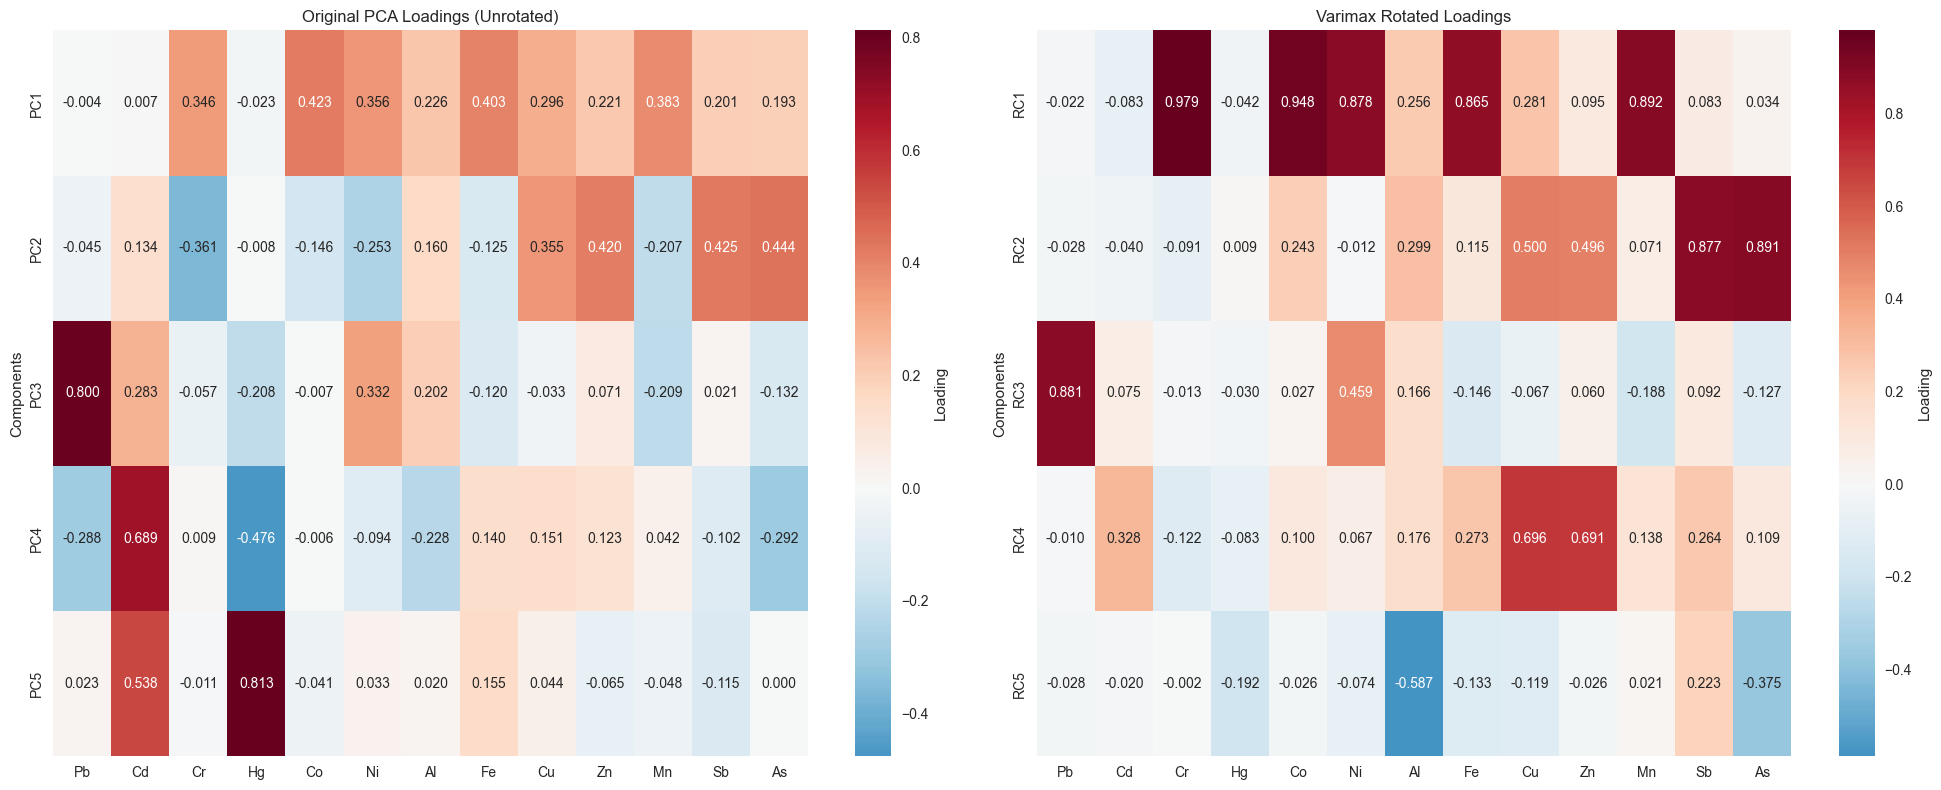

📊 Rotation helps achieve simpler structure with clearer variable groupings!


In [67]:
# Original loadings (unrotated)
original_loadings = pca_selected.components_.T

print("=== COMPARISON: ORIGINAL vs ROTATED LOADINGS ===")

# Create comparison dataframes
original_df = pd.DataFrame(
    original_loadings,
    index=df_pca.columns,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

rotated_df = pd.DataFrame(
    rotated_loadings,
    index=df_pca.columns,
    columns=[f'RC{i+1}' for i in range(n_components)]
)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Original loadings heatmap
sns.heatmap(original_df.T, annot=True, cmap='RdBu_r', center=0, 
            fmt='.3f', ax=axes[0], cbar_kws={'label': 'Loading'})
axes[0].set_title('Original PCA Loadings (Unrotated)')
axes[0].set_ylabel('Components')

# Rotated loadings heatmap
sns.heatmap(rotated_df.T, annot=True, cmap='RdBu_r', center=0, 
            fmt='.3f', ax=axes[1], cbar_kws={'label': 'Loading'})
axes[1].set_title('Varimax Rotated Loadings')
axes[1].set_ylabel('Components')

plt.tight_layout()
plt.show()

print("📊 Rotation helps achieve simpler structure with clearer variable groupings!")


# Step 7: 3D Rotated Component Plot

### 7.1 Create 3D visualization of rotated components

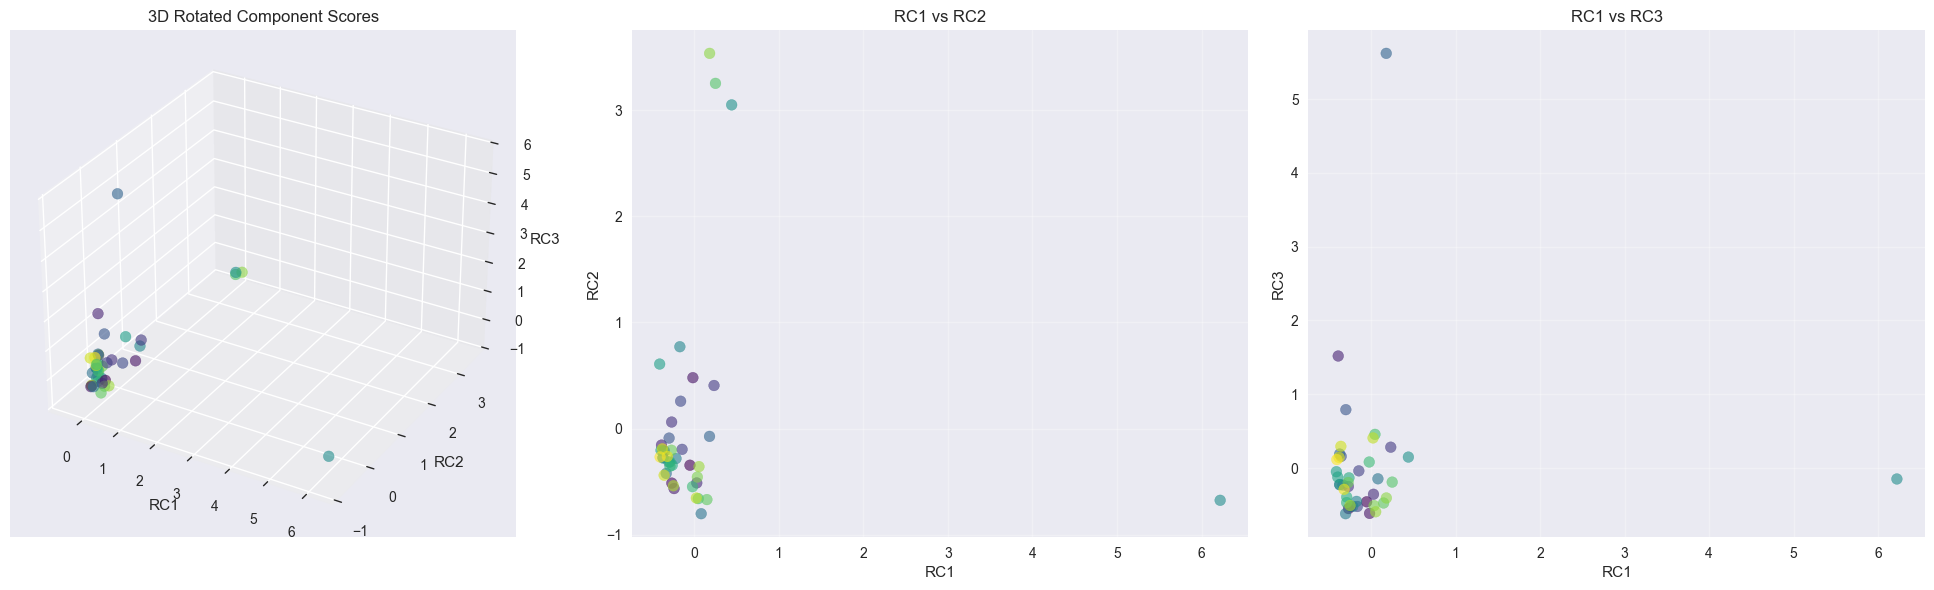

✓ 3D rotated component plot created successfully!


In [68]:

if n_components >= 3:
    # 3D scatter plot
    fig = plt.figure(figsize=(20, 6))
    
    # 3D plot of component scores
    ax1 = fig.add_subplot(131, projection='3d')
    
    # Color points by sample index
    colors = plt.cm.viridis(np.linspace(0, 1, len(rotated_scores)))
    scatter = ax1.scatter(rotated_scores[:, 0], rotated_scores[:, 1], rotated_scores[:, 2],
                         c=range(len(rotated_scores)), cmap='viridis', alpha=0.6, s=60)
    
    ax1.set_xlabel('RC1')
    ax1.set_ylabel('RC2')
    ax1.set_zlabel('RC3')
    ax1.set_title('3D Rotated Component Scores')
    
    # 2D projections
    ax2 = fig.add_subplot(132)
    scatter2 = ax2.scatter(rotated_scores[:, 0], rotated_scores[:, 1],
                          c=range(len(rotated_scores)), cmap='viridis', alpha=0.6, s=60)
    ax2.set_xlabel('RC1')
    ax2.set_ylabel('RC2')
    ax2.set_title('RC1 vs RC2')
    ax2.grid(True, alpha=0.3)
    
    ax3 = fig.add_subplot(133)
    scatter3 = ax3.scatter(rotated_scores[:, 0], rotated_scores[:, 2],
                          c=range(len(rotated_scores)), cmap='viridis', alpha=0.6, s=60)
    ax3.set_xlabel('RC1')
    ax3.set_ylabel('RC3')
    ax3.set_title('RC1 vs RC3')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ 3D rotated component plot created successfully!")
    
else:
    # 2D plot if less than 3 components
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scores plot
    scatter = axes[0].scatter(rotated_scores[:, 0], rotated_scores[:, 1],
                             c=range(len(rotated_scores)), cmap='viridis', alpha=0.6, s=60)
    axes[0].set_xlabel('RC1')
    axes[0].set_ylabel('RC2')
    axes[0].set_title('2D Rotated Component Scores')
    axes[0].grid(True, alpha=0.3)
    
    # Add sample numbers as labels
    for i, (x, y) in enumerate(rotated_scores[:, :2]):
        axes[0].annotate(f'{i+1}', (x, y), xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.7)
    
    # Distribution of scores
    axes[1].hist(rotated_scores[:, 0], alpha=0.7, label='RC1', bins=15)
    axes[1].hist(rotated_scores[:, 1], alpha=0.7, label='RC2', bins=15)
    axes[1].set_xlabel('Component Score')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Distribution of Component Scores')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✓ 2D component plots created ({n_components} components available)")


### 7.2 Create biplot with variable loadings

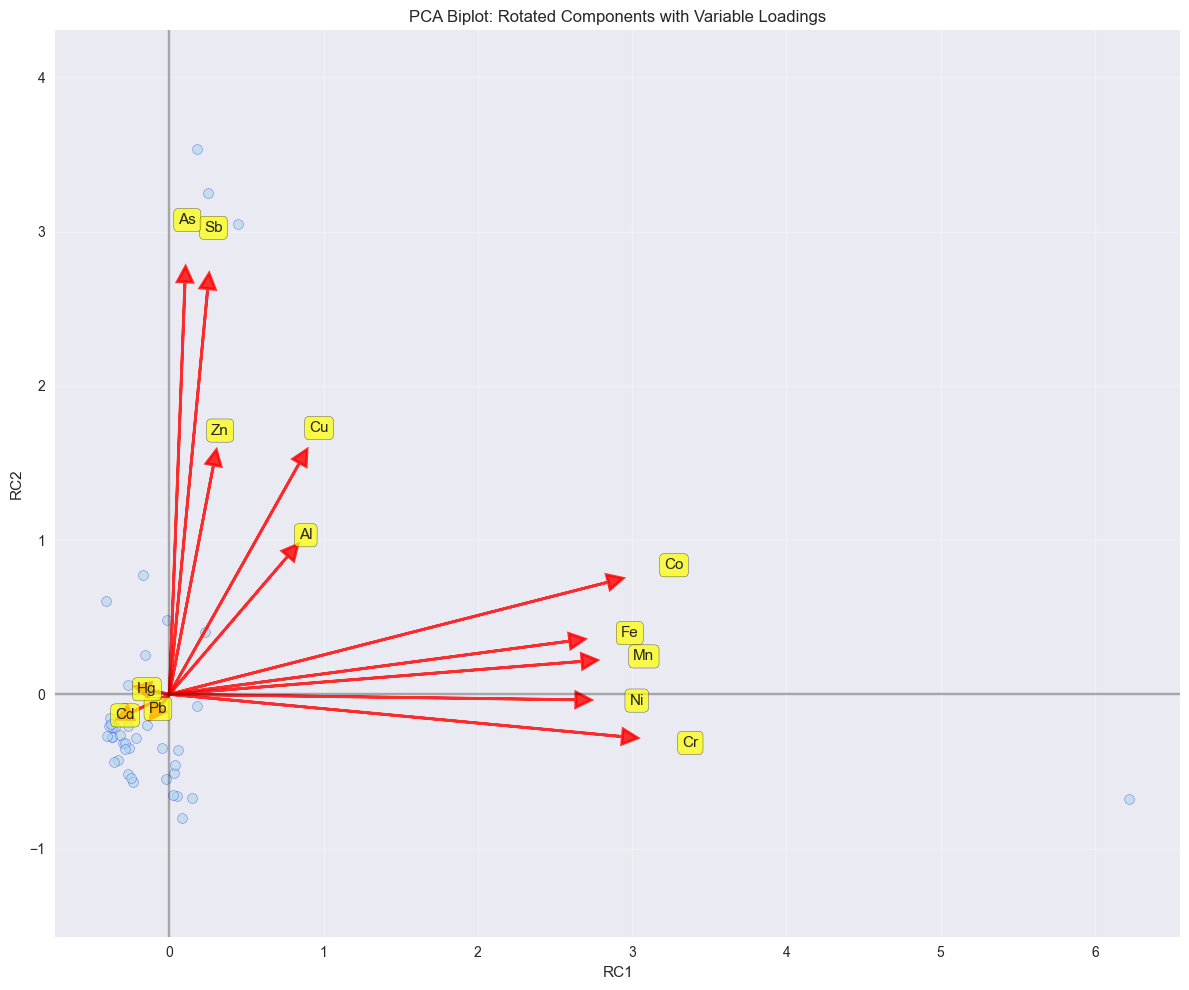

📊 Biplot shows both sample positions and variable contributions!


In [69]:

plt.figure(figsize=(12, 10))

# Biplot: scores + loadings
plt.scatter(rotated_scores[:, 0], rotated_scores[:, 1], alpha=0.6, s=50, c='lightblue', edgecolors='blue')

# Add variable vectors
scale_factor = 3  # Scale factor for arrows
for i, var in enumerate(df_pca.columns):
    plt.arrow(0, 0, rotated_loadings[i, 0] * scale_factor, rotated_loadings[i, 1] * scale_factor,
             head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.8, linewidth=2)
    plt.text(rotated_loadings[i, 0] * scale_factor * 1.15, 
             rotated_loadings[i, 1] * scale_factor * 1.15, 
             var, fontsize=11, ha='center', va='center', 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.xlabel('RC1')
plt.ylabel('RC2')
plt.title('PCA Biplot: Rotated Components with Variable Loadings')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Add quadrant lines
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Biplot shows both sample positions and variable contributions!")


# Step 8: Component Loadings Table

### 8.1 Create comprehensive loadings table

In [70]:

loadings_df = pd.DataFrame(
    rotated_loadings,
    index=df_pca.columns,
    columns=[f'RC{i+1}' for i in range(n_components)]
)

print("=== ROTATED COMPONENT LOADINGS TABLE ===")
print(loadings_df.round(3))

=== ROTATED COMPONENT LOADINGS TABLE ===
      RC1    RC2    RC3    RC4    RC5
Pb -0.022 -0.028  0.881 -0.010 -0.028
Cd -0.083 -0.040  0.075  0.328 -0.020
Cr  0.979 -0.091 -0.013 -0.122 -0.002
Hg -0.042  0.009 -0.030 -0.083 -0.192
Co  0.948  0.243  0.027  0.100 -0.026
Ni  0.878 -0.012  0.459  0.067 -0.074
Al  0.256  0.299  0.166  0.176 -0.587
Fe  0.865  0.115 -0.146  0.273 -0.133
Cu  0.281  0.500 -0.067  0.696 -0.119
Zn  0.095  0.496  0.060  0.691 -0.026
Mn  0.892  0.071 -0.188  0.138  0.021
Sb  0.083  0.877  0.092  0.264  0.223
As  0.034  0.891 -0.127  0.109 -0.375


### 8.2 Identify high loadings and create summary

In [71]:
# Define threshold for "high" loadings
loading_threshold = 0.5

print(f"\n=== HIGH LOADINGS (|loading| > {loading_threshold}) ===")

high_loadings_summary = {}
for col in loadings_df.columns:
    high_loadings = loadings_df[abs(loadings_df[col]) > loading_threshold][col]
    high_loadings_summary[col] = high_loadings
    
    if not high_loadings.empty:
        print(f"\n{col}:")
        for var, loading in high_loadings.sort_values(key=abs, ascending=False).items():
            direction = "+" if loading > 0 else "-"
            print(f"  {direction} {var}: {loading:.3f}")
    else:
        print(f"\n{col}: No high loadings found")


=== HIGH LOADINGS (|loading| > 0.5) ===

RC1:
  + Cr: 0.979
  + Co: 0.948
  + Mn: 0.892
  + Ni: 0.878
  + Fe: 0.865

RC2:
  + As: 0.891
  + Sb: 0.877
  + Cu: 0.500

RC3:
  + Pb: 0.881

RC4:
  + Cu: 0.696
  + Zn: 0.691

RC5:
  - Al: -0.587


### 8.3 Calculate and display communalities


=== COMMUNALITIES ===
(Proportion of each variable's variance explained by selected components)
   Variable  Communality  Percent_Explained
5        Ni        0.992             99.199
2        Cr        0.982             98.177
4        Co        0.969             96.927
12       As        0.964             96.422
11       Sb        0.903             90.310
7        Fe        0.875             87.527
10       Mn        0.855             85.504
8        Cu        0.833             83.269
0        Pb        0.778             77.812
9        Zn        0.737             73.684
6        Al        0.558             55.812
1        Cd        0.122             12.185
3        Hg        0.047              4.654


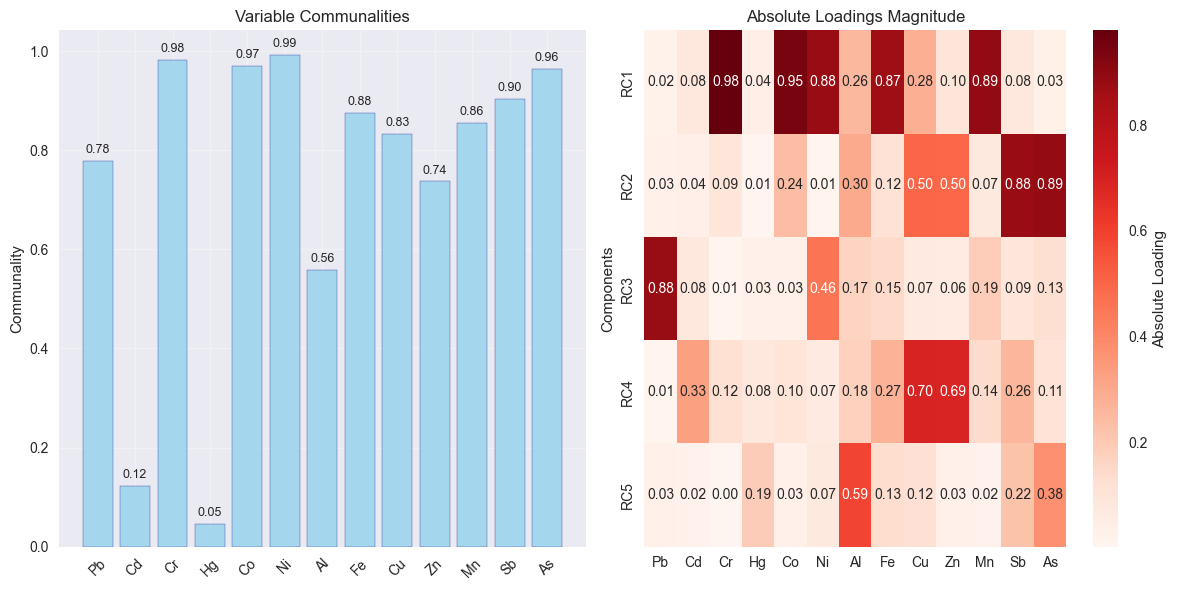

In [72]:
# Communalities: proportion of variance in each variable explained by the selected components
communalities = (rotated_loadings ** 2).sum(axis=1)

communalities_df = pd.DataFrame({
    'Variable': df_pca.columns,
    'Communality': communalities,
    'Percent_Explained': communalities * 100
}).sort_values('Communality', ascending=False)

print(f"\n=== COMMUNALITIES ===")
print("(Proportion of each variable's variance explained by selected components)")
print(communalities_df.round(3))

# Visualize communalities
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(range(len(communalities)), communalities, alpha=0.7, color='skyblue', edgecolor='navy')
plt.xticks(range(len(communalities)), df_pca.columns, rotation=45)
plt.ylabel('Communality')
plt.title('Variable Communalities')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Loadings magnitude heatmap
plt.subplot(1, 2, 2)
loadings_abs = np.abs(loadings_df)
sns.heatmap(loadings_abs.T, annot=True, cmap='Reds', fmt='.2f', 
            cbar_kws={'label': 'Absolute Loading'})
plt.title('Absolute Loadings Magnitude')
plt.ylabel('Components')

plt.tight_layout()
plt.show()

# Step 9: Interpretation of Principal Components

### 9.1 Analyze and interpret each component

In [73]:

print("=== INTERPRETATION OF PRINCIPAL COMPONENTS ===")

interpretations = []
component_characteristics = []

for i in range(n_components):
    col_name = f'RC{i+1}'
    loadings = loadings_df[col_name]
    
    # Get variance explained by this component
    variance_explained = explained_variance_ratio[i]
    eigenvalue = eigenvalues[i]
    
    print(f"\n{'='*50}")
    print(f"{col_name} - COMPONENT ANALYSIS")
    print(f"{'='*50}")
    print(f"Eigenvalue: {eigenvalue:.3f}")
    print(f"Variance Explained: {variance_explained:.3f} ({variance_explained*100:.1f}%)")
    
    # Find high positive and negative loadings
    high_positive = loadings[loadings > loading_threshold].sort_values(ascending=False)
    high_negative = loadings[loadings < -loading_threshold].sort_values()
    moderate_positive = loadings[(loadings > 0.3) & (loadings <= loading_threshold)].sort_values(ascending=False)
    moderate_negative = loadings[(loadings < -0.3) & (loadings >= -loading_threshold)].sort_values()
    
    print(f"\nHIGH POSITIVE LOADINGS (> {loading_threshold}):")
    if not high_positive.empty:
        for var, val in high_positive.items():
            print(f"  {var}: {val:.3f}")
    else:
        print("  None")
    
    print(f"\nMODERATE POSITIVE LOADINGS (0.3 to {loading_threshold}):")
    if not moderate_positive.empty:
        for var, val in moderate_positive.items():
            print(f"  {var}: {val:.3f}")
    else:
        print("  None")
        
    print(f"\nHIGH NEGATIVE LOADINGS (< -{loading_threshold}):")
    if not high_negative.empty:
        for var, val in high_negative.items():
            print(f"  {var}: {val:.3f}")
    else:
        print("  None")
    
    print(f"\nMODERATE NEGATIVE LOADINGS (-{loading_threshold} to -0.3):")
    if not moderate_negative.empty:
        for var, val in moderate_negative.items():
            print(f"  {var}: {val:.3f}")
    else:
        print("  None")
    
    # Suggest interpretation based on metal groupings
    all_high_vars = list(high_positive.index) + list(high_negative.index)
    
    # Metal classification
    heavy_metals = ['Pb', 'Cd', 'Hg']
    transition_metals = ['Ni', 'Co', 'Cr', 'Cu']
    crustal_elements = ['Fe', 'Al', 'Mn']
    anthropogenic = ['Zn', 'Cu', 'Pb']
    toxic_elements = ['Pb', 'Cd', 'Hg', 'As']
    
    interpretation = "Mixed Sources"
    if any(metal in all_high_vars for metal in heavy_metals):
        if len(set(all_high_vars) & set(heavy_metals)) >= 2:
            interpretation = "Heavy Metals/Toxicity Factor"
        elif 'Pb' in all_high_vars:
            interpretation = "Lead Contamination Factor"
    elif any(metal in all_high_vars for metal in crustal_elements):
        if len(set(all_high_vars) & set(crustal_elements)) >= 2:
            interpretation = "Natural/Crustal Elements Factor"
    elif any(metal in all_high_vars for metal in transition_metals):
        interpretation = "Transition Metals Factor"
    elif any(metal in all_high_vars for metal in anthropogenic):
        interpretation = "Industrial/Anthropogenic Factor"
    
    interpretations.append(interpretation)
    
    # Store component characteristics
    component_characteristics.append({
        'Component': col_name,
        'Eigenvalue': eigenvalue,
        'Variance_Explained': variance_explained,
        'Interpretation': interpretation,
        'Key_Variables': ', '.join(all_high_vars) if all_high_vars else 'None',
        'Dominant_Metals': ', '.join(high_positive.index[:3]) if not high_positive.empty else 'None'
    })
    
    print(f"\n🔍 INTERPRETATION: {interpretation}")
    
    # Detailed interpretation
    if interpretation == "Heavy Metals/Toxicity Factor":
        print("   This component represents toxic heavy metal contamination.")
        print("   High scores indicate samples with elevated toxic metal levels.")
    elif interpretation == "Natural/Crustal Elements Factor":
        print("   This component represents natural geological background.")
        print("   High scores indicate samples with high crustal element content.")
    elif interpretation == "Industrial/Anthropogenic Factor":
        print("   This component represents human-induced contamination.")
        print("   High scores indicate samples affected by industrial activities.")
    elif interpretation == "Transition Metals Factor":
        print("   This component represents transition metal associations.")
        print("   May indicate specific industrial processes or natural deposits.")


=== INTERPRETATION OF PRINCIPAL COMPONENTS ===

RC1 - COMPONENT ANALYSIS
Eigenvalue: 5.130
Variance Explained: 0.385 (38.5%)

HIGH POSITIVE LOADINGS (> 0.5):
  Cr: 0.979
  Co: 0.948
  Mn: 0.892
  Ni: 0.878
  Fe: 0.865

MODERATE POSITIVE LOADINGS (0.3 to 0.5):
  None

HIGH NEGATIVE LOADINGS (< -0.5):
  None

MODERATE NEGATIVE LOADINGS (-0.5 to -0.3):
  None

🔍 INTERPRETATION: Natural/Crustal Elements Factor
   This component represents natural geological background.
   High scores indicate samples with high crustal element content.

RC2 - COMPONENT ANALYSIS
Eigenvalue: 2.748
Variance Explained: 0.206 (20.6%)

HIGH POSITIVE LOADINGS (> 0.5):
  As: 0.891
  Sb: 0.877
  Cu: 0.500

MODERATE POSITIVE LOADINGS (0.3 to 0.5):
  Zn: 0.496

HIGH NEGATIVE LOADINGS (< -0.5):
  None

MODERATE NEGATIVE LOADINGS (-0.5 to -0.3):
  None

🔍 INTERPRETATION: Transition Metals Factor
   This component represents transition metal associations.
   May indicate specific industrial processes or natural deposits.

### 9.2 Create summary table of interpretations

In [74]:
interpretation_df = pd.DataFrame(component_characteristics)
print(f"\n=== COMPONENT SUMMARY TABLE ===")
print(interpretation_df)


=== COMPONENT SUMMARY TABLE ===
  Component  Eigenvalue  Variance_Explained                   Interpretation  \
0       RC1    5.129663            0.385194  Natural/Crustal Elements Factor   
1       RC2    2.748071            0.206357         Transition Metals Factor   
2       RC3    1.342672            0.100823        Lead Contamination Factor   
3       RC4    1.057607            0.079417         Transition Metals Factor   
4       RC5    1.041273            0.078191                    Mixed Sources   

        Key_Variables Dominant_Metals  
0  Cr, Co, Mn, Ni, Fe      Cr, Co, Mn  
1          As, Sb, Cu      As, Sb, Cu  
2                  Pb              Pb  
3              Cu, Zn          Cu, Zn  
4                  Al            None  


### 9.3 Visualize component interpretations

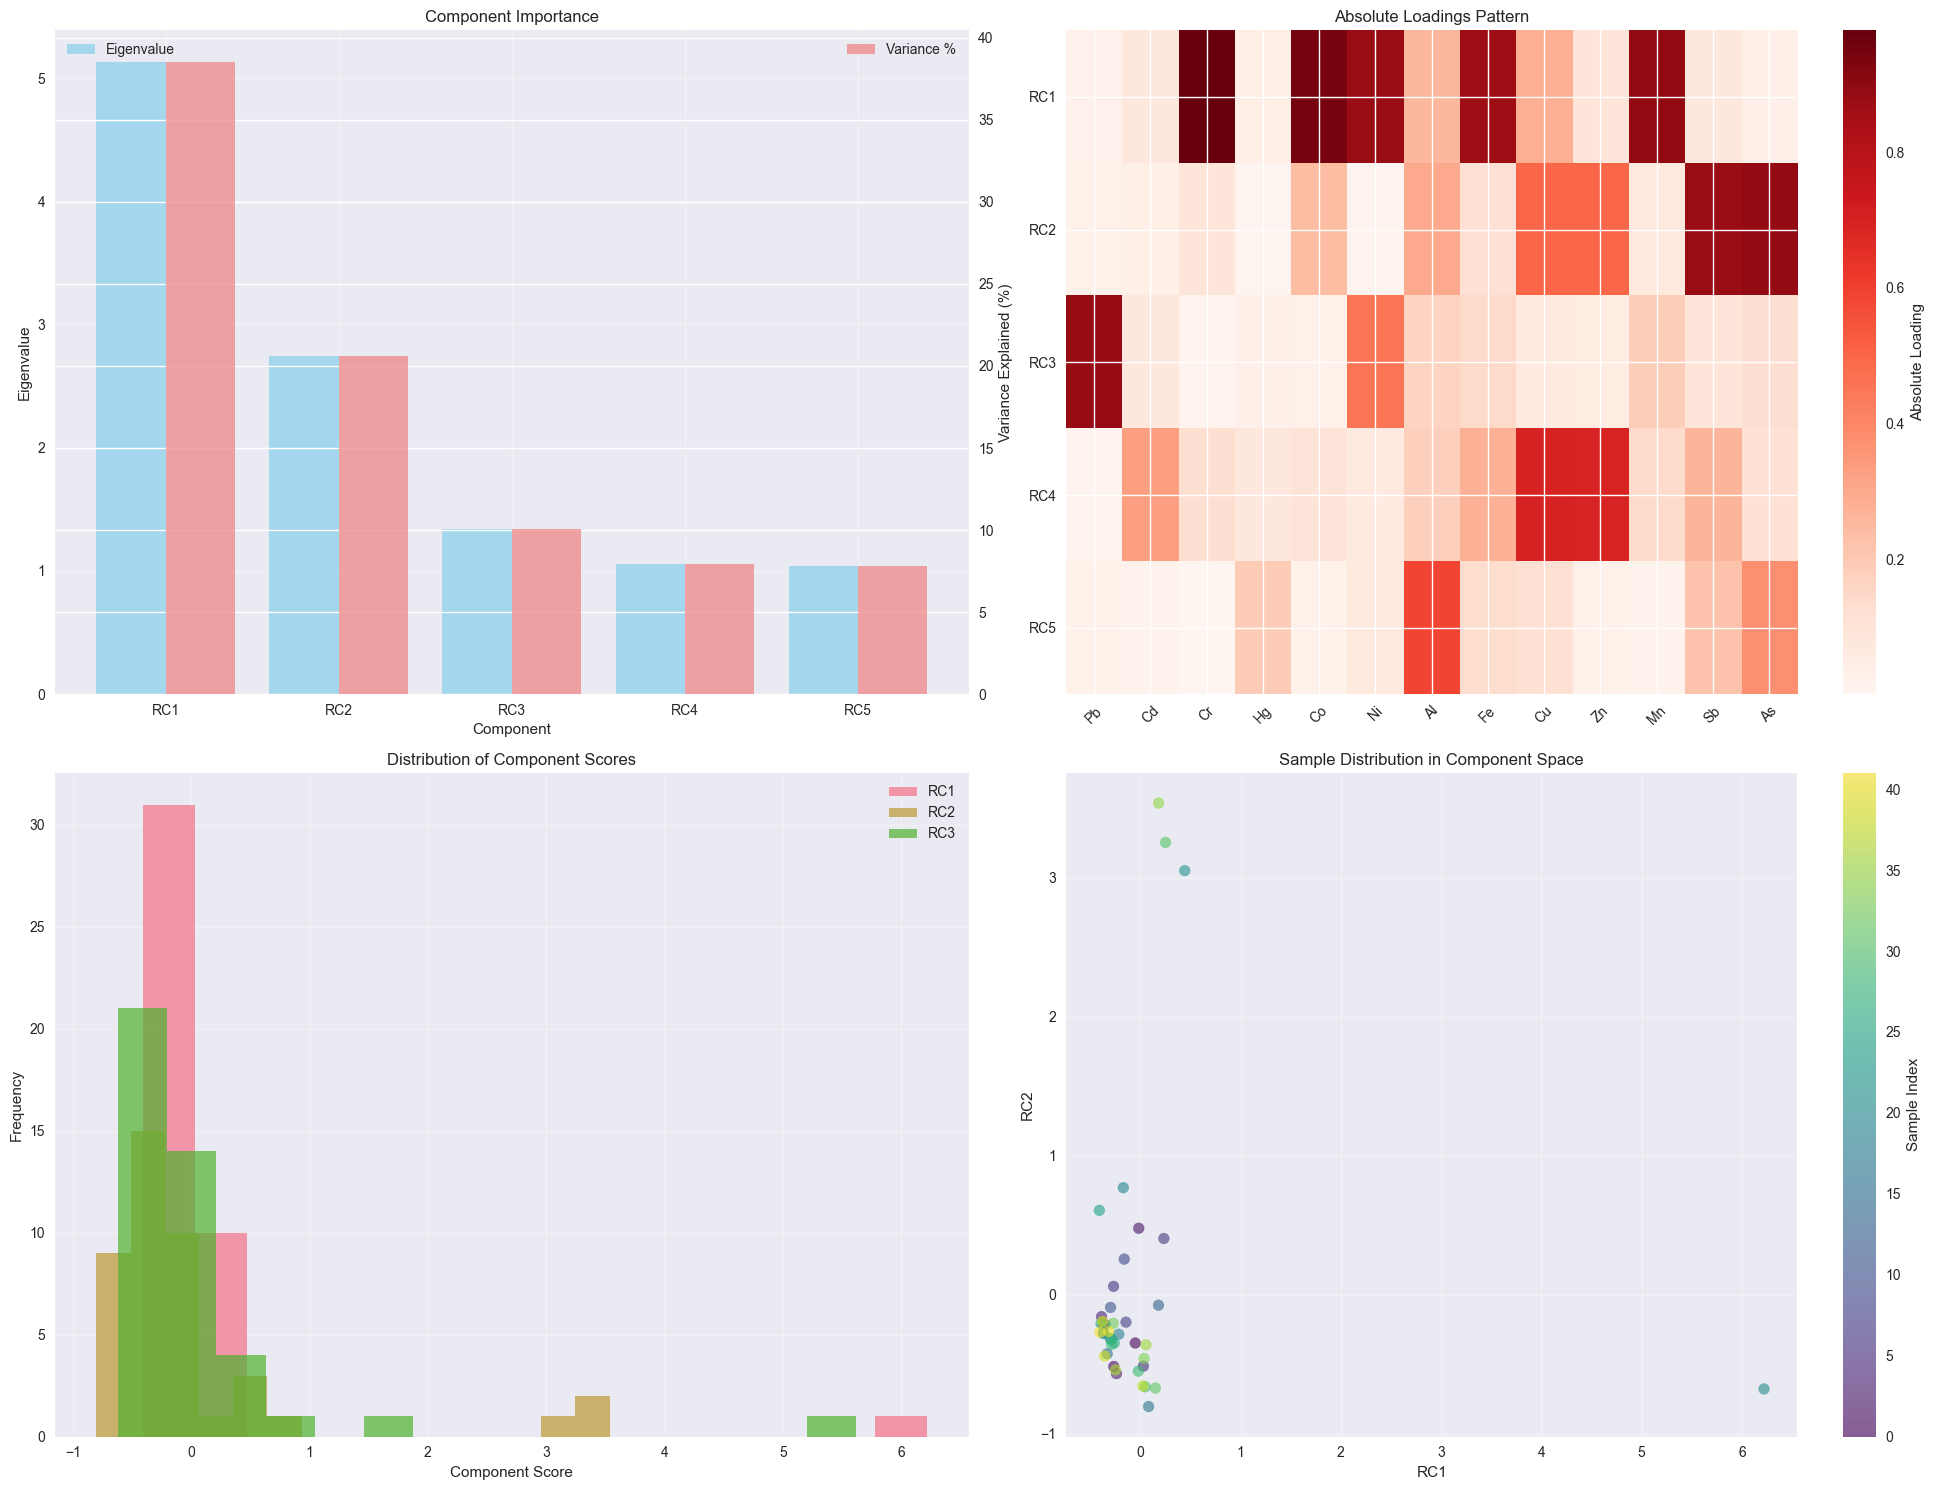

In [75]:
# Create interpretation visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Eigenvalues and variance explained
ax1 = axes[0, 0]
x_pos = np.arange(n_components)
bars1 = ax1.bar(x_pos - 0.2, eigenvalues[:n_components], 0.4, 
                label='Eigenvalue', alpha=0.7, color='skyblue')
ax1_twin = ax1.twinx()
bars2 = ax1_twin.bar(x_pos + 0.2, explained_variance_ratio[:n_components] * 100, 0.4,
                     label='Variance %', alpha=0.7, color='lightcoral')

ax1.set_xlabel('Component')
ax1.set_ylabel('Eigenvalue')
ax1_twin.set_ylabel('Variance Explained (%)')
ax1.set_title('Component Importance')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'RC{i+1}' for i in range(n_components)])
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Loadings pattern
ax2 = axes[0, 1]
loadings_abs = np.abs(loadings_df.values)
im = ax2.imshow(loadings_abs.T, cmap='Reds', aspect='auto')
ax2.set_xticks(range(len(df_pca.columns)))
ax2.set_xticklabels(df_pca.columns, rotation=45)
ax2.set_yticks(range(n_components))
ax2.set_yticklabels([f'RC{i+1}' for i in range(n_components)])
ax2.set_title('Absolute Loadings Pattern')
plt.colorbar(im, ax=ax2, label='Absolute Loading')

# Plot 3: Component scores distribution
ax3 = axes[1, 0]
for i in range(min(3, n_components)):
    ax3.hist(rotated_scores[:, i], alpha=0.7, label=f'RC{i+1}', bins=15)
ax3.set_xlabel('Component Score')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Component Scores')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Component relationships
ax4 = axes[1, 1]
if n_components >= 2:
    scatter = ax4.scatter(rotated_scores[:, 0], rotated_scores[:, 1],
                         c=range(len(rotated_scores)), cmap='viridis', alpha=0.6, s=60)
    ax4.set_xlabel('RC1')
    ax4.set_ylabel('RC2')
    ax4.set_title('Sample Distribution in Component Space')
    ax4.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax4, label='Sample Index')

plt.tight_layout()
plt.show()

# Step 10: Total Explained Variance Summary


### 10.1 Calculate final variance summary

In [76]:

total_variance_explained = cumulative_variance[n_components-1]
unexplained_variance = 1 - total_variance_explained

print("="*80)
print("FINAL PCA ANALYSIS SUMMARY")
print("="*80)

print(f"\nDATASET: {DATASET}")
print(f"Number of Variables: {len(df_pca.columns)}")
print(f"Number of Samples: {len(df_pca)}")
print(f"Variables Analyzed: {', '.join(df_pca.columns)}")

print(f"\nCOMPONENT SELECTION:")
print(f"Selected Components: {n_components}")
print(f"Selection Criteria: Kaiser Rule (eigenvalue > 1)")
print(f"Alternative suggestions:")
print(f"  - Scree plot elbow: {elbow_point} components")
for threshold, components in components_needed.items():
    print(f"  - {threshold} variance: {components} components")

print(f"\nVARIANCE EXPLANATION:")
print(f"Total Variance Explained: {total_variance_explained:.3f} ({total_variance_explained*100:.1f}%)")
print(f"Unexplained Variance: {unexplained_variance:.3f} ({unexplained_variance*100:.1f}%)")

print(f"\nCOMPONENT BREAKDOWN:")
cumulative = 0
for i in range(n_components):
    individual = explained_variance_ratio[i]
    cumulative += individual
    print(f"  RC{i+1}: {individual:.3f} ({individual*100:.1f}%) | {interpretations[i]}")
    print(f"       Cumulative: {cumulative:.3f} ({cumulative*100:.1f}%)")


FINAL PCA ANALYSIS SUMMARY

DATASET: Tamarind
Number of Variables: 13
Number of Samples: 42
Variables Analyzed: Pb, Cd, Cr, Hg, Co, Ni, Al, Fe, Cu, Zn, Mn, Sb, As

COMPONENT SELECTION:
Selected Components: 5
Selection Criteria: Kaiser Rule (eigenvalue > 1)
Alternative suggestions:
  - Scree plot elbow: 3 components
  - 70% variance: 4 components
  - 80% variance: 5 components
  - 90% variance: 6 components
  - 95% variance: 7 components

VARIANCE EXPLANATION:
Total Variance Explained: 0.850 (85.0%)
Unexplained Variance: 0.150 (15.0%)

COMPONENT BREAKDOWN:
  RC1: 0.385 (38.5%) | Natural/Crustal Elements Factor
       Cumulative: 0.385 (38.5%)
  RC2: 0.206 (20.6%) | Transition Metals Factor
       Cumulative: 0.592 (59.2%)
  RC3: 0.101 (10.1%) | Lead Contamination Factor
       Cumulative: 0.692 (69.2%)
  RC4: 0.079 (7.9%) | Transition Metals Factor
       Cumulative: 0.772 (77.2%)
  RC5: 0.078 (7.8%) | Mixed Sources
       Cumulative: 0.850 (85.0%)


### 10.2 Create final summary visualization

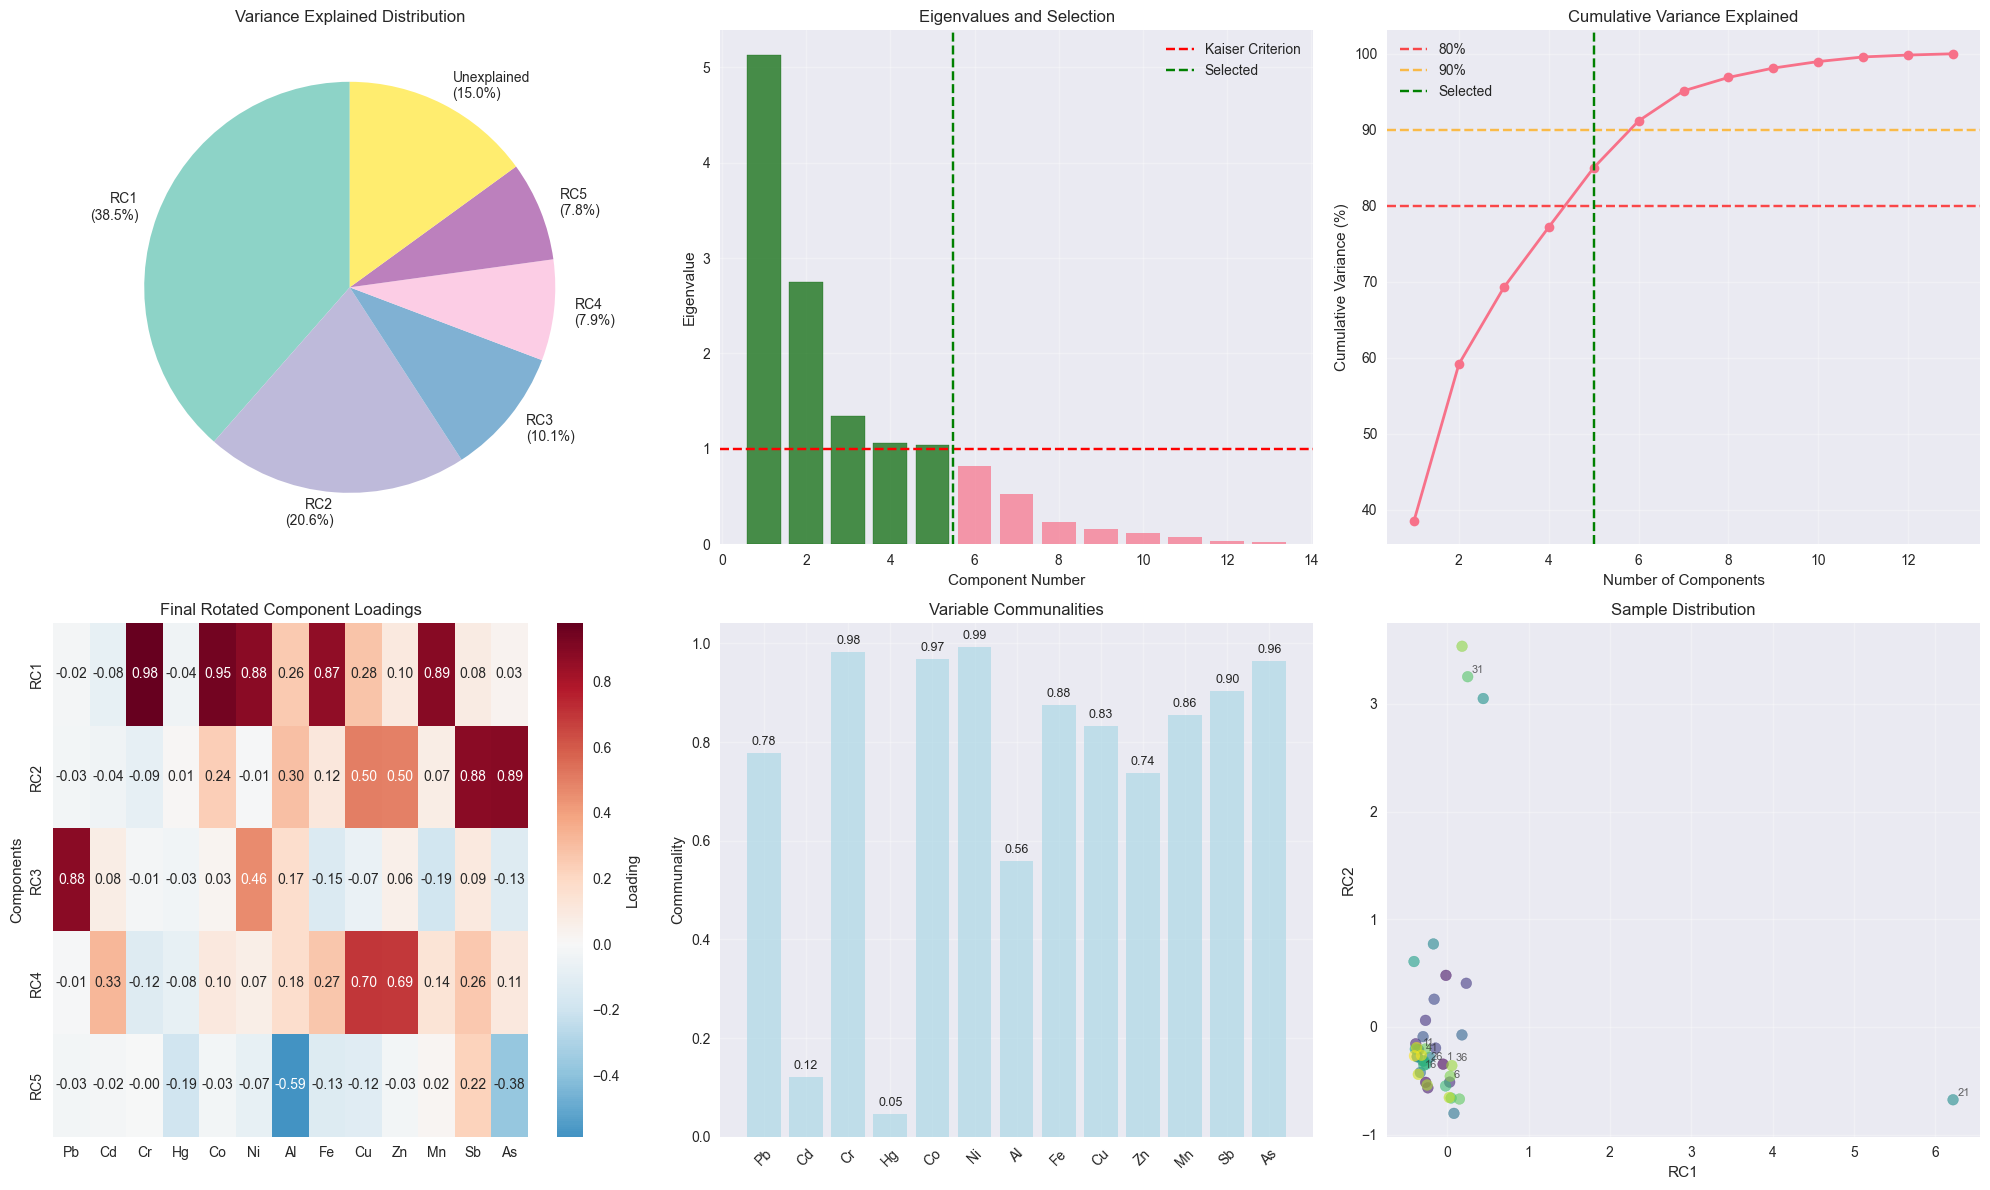

In [77]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot 1: Variance breakdown pie chart
ax1 = axes[0, 0]
explained_individual = explained_variance_ratio[:n_components]
if unexplained_variance > 0.01:  # Only show if significant
    variance_data = list(explained_individual) + [unexplained_variance]
    labels = [f'RC{i+1}\n({val*100:.1f}%)' for i, val in enumerate(explained_individual)] + [f'Unexplained\n({unexplained_variance*100:.1f}%)']
    colors = plt.cm.Set3(np.linspace(0, 1, len(variance_data)))
else:
    variance_data = explained_individual
    labels = [f'RC{i+1}\n({val*100:.1f}%)' for i, val in enumerate(explained_individual)]
    colors = plt.cm.Set3(np.linspace(0, 1, len(variance_data)))

wedges, texts, autotexts = ax1.pie(variance_data, labels=labels, autopct='', 
                                   colors=colors, startangle=90)
ax1.set_title('Variance Explained Distribution')

# Plot 2: Eigenvalues bar chart
ax2 = axes[0, 1]
bars = ax2.bar(range(1, len(eigenvalues)+1), eigenvalues, alpha=0.7)
ax2.axhline(y=1, color='red', linestyle='--', label='Kaiser Criterion')
ax2.axvline(x=n_components+0.5, color='green', linestyle='--', label='Selected')

# Color selected components
for i in range(n_components):
    bars[i].set_color('darkgreen')

ax2.set_xlabel('Component Number')
ax2.set_ylabel('Eigenvalue')
ax2.set_title('Eigenvalues and Selection')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Cumulative variance
ax3 = axes[0, 2]
ax3.plot(range(1, len(cumulative_variance)+1), cumulative_variance*100, 'o-', linewidth=2)
ax3.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80%')
ax3.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90%')
ax3.axvline(x=n_components, color='green', linestyle='--', label='Selected')
ax3.set_xlabel('Number of Components')
ax3.set_ylabel('Cumulative Variance (%)')
ax3.set_title('Cumulative Variance Explained')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Final loadings heatmap
ax4 = axes[1, 0]
sns.heatmap(loadings_df.T, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', ax=ax4, cbar_kws={'label': 'Loading'})
ax4.set_title('Final Rotated Component Loadings')
ax4.set_ylabel('Components')

# Plot 5: Communalities
ax5 = axes[1, 1]
bars = ax5.bar(range(len(communalities)), communalities, alpha=0.7, color='lightblue')
ax5.set_xticks(range(len(communalities)))
ax5.set_xticklabels(df_pca.columns, rotation=45)
ax5.set_ylabel('Communality')
ax5.set_title('Variable Communalities')
ax5.grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Plot 6: Sample scores in component space
ax6 = axes[1, 2]
if n_components >= 2:
    scatter = ax6.scatter(rotated_scores[:, 0], rotated_scores[:, 1],
                         c=range(len(rotated_scores)), cmap='viridis', alpha=0.6, s=60)
    ax6.set_xlabel('RC1')
    ax6.set_ylabel('RC2')
    ax6.set_title('Sample Distribution')
    ax6.grid(True, alpha=0.3)
    
    # Add sample ID labels for the original dataset
    sample_ids = df_original['Sample ID'].values
    for i, (x, y) in enumerate(rotated_scores[:, :2]):
        if i % 5 == 0:  # Label every 5th sample to avoid crowding
            ax6.annotate(f'{sample_ids[i]}', (x, y), xytext=(3, 3), 
                        textcoords='offset points', fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

### 10.3 Export results to Excel

In [78]:
def export_pca_results():
    """Export all PCA results to Excel file"""
    
    filename = f'PCA_Analysis_Results_{DATASET}.xlsx'
    
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        
        # Sheet 1: Summary
        summary_data = {
            'Component': [f'RC{i+1}' for i in range(n_components)],
            'Eigenvalue': eigenvalues[:n_components],
            'Variance_Explained': explained_variance_ratio[:n_components],
            'Cumulative_Variance': cumulative_variance[:n_components],
            'Interpretation': interpretations
        }
        summary_df = pd.DataFrame(summary_data)
        summary_df.to_excel(writer, sheet_name='Summary', index=False)
        
        # Sheet 2: Rotated Loadings
        loadings_df.to_excel(writer, sheet_name='Rotated_Loadings')
        
        # Sheet 3: Component Scores
        scores_df = pd.DataFrame(rotated_scores, 
                               columns=[f'RC{i+1}' for i in range(n_components)])
        scores_df.insert(0, 'Sample_ID', df_original['Sample ID'].values)
        scores_df.to_excel(writer, sheet_name='Component_Scores', index=False)
        
        # Sheet 4: Communalities
        communalities_df.to_excel(writer, sheet_name='Communalities', index=False)
        
        # Sheet 5: Original Data
        df_original.to_excel(writer, sheet_name='Original_Data', index=False)
        
        # Sheet 6: Standardized Data
        df_std_export = df_standardized.copy()
        df_std_export.insert(0, 'Sample_ID', df_original['Sample ID'].values)
        df_std_export.to_excel(writer, sheet_name='Standardized_Data', index=False)
    
    print(f"✅ Results exported to: {filename}")
    
    # Create summary text file
    with open(f'PCA_Summary_{DATASET}.txt', 'w') as f:
        f.write(f"PCA ANALYSIS SUMMARY - {DATASET} DATASET\n")
        f.write("="*50 + "\n\n")
        f.write(f"Number of Variables: {len(df_pca.columns)}\n")
        f.write(f"Number of Samples: {len(df_pca)}\n")
        f.write(f"Selected Components: {n_components}\n")
        f.write(f"Total Variance Explained: {total_variance_explained:.1%}\n\n")
        
        f.write("COMPONENT INTERPRETATIONS:\n")
        f.write("-" * 30 + "\n")
        for i, interpretation in enumerate(interpretations):
            f.write(f"RC{i+1}: {interpretation}\n")
            f.write(f"     Variance: {explained_variance_ratio[i]:.1%}\n")
            f.write(f"     Eigenvalue: {eigenvalues[i]:.3f}\n\n")
    
    print(f"✅ Summary exported to: PCA_Summary_{DATASET}.txt")


In [79]:
export_pca_results()

✅ Results exported to: PCA_Analysis_Results_Tamarind.xlsx
✅ Summary exported to: PCA_Summary_Tamarind.txt


In [80]:
print("\n" + "="*80)
print("🎉 PCA ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*80)
print(f"\nKey Findings for {DATASET} Dataset:")
print(f"• {n_components} principal components explain {total_variance_explained:.1%} of variance")
print(f"• Components represent: {', '.join(interpretations)}")
print(f"• Results exported to Excel and text files")
print("\n📊 All plots and tables are ready for publication!")


🎉 PCA ANALYSIS COMPLETED SUCCESSFULLY!

Key Findings for Tamarind Dataset:
• 5 principal components explain 85.0% of variance
• Components represent: Natural/Crustal Elements Factor, Transition Metals Factor, Lead Contamination Factor, Transition Metals Factor, Mixed Sources
• Results exported to Excel and text files

📊 All plots and tables are ready for publication!
